<a href="https://colab.research.google.com/github/geovanemelo/Portfolios-Data-Science/blob/main/An%C3%A1lise_de_viol%C3%AAncia_no_estado_do_Rio_de_Janeiro_em_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Science na Prática**

*by [Geovane Melo](https://www.linkedin.com/in/geovane-melo-da-silva-105040147/)*

---

# Análise de violência no estado do Rio de Janeiro em 2019

A violência é uma preocupação diária de praticamente todo brasileiro, porém no Rio De Janeiro, esse mal tem se tornado característica do cotidiano do carioca.

Segundo o portal [Circuito D](https://www.circuitod.com.br/) com dados do [Anuário Brasileiro De Segurança Pública](https://forumseguranca.org.br/anuario-brasileiro-seguranca-publica/), o estado do Rio de Janeiro é o *sétimo no ranking de violência* dos estados brasileiros, sendo o primeiro isolado quando se tratamos apenas da região sul - sudeste.

Mesmo com as informações e dados que comprovam que o estado do RJ é um estado perigoso, essa violência está centralizada na capital? Ou será que todo estado fluminense está assombrado por esse medo urbano?

Nesse estudo, iremos analisar os números de ocorrência registradas de cada em crime, em cada munícipio. Ao final do projeto, poderemos identificar as cidades mais violentas além de outras informações relevantes.

Usaremos como ferramenta a linguagem de programação Python e ambiente desenvolvimento Google Colab


<center><img alt="Mapa do RJ" width="40%" src="http://voightseg.com.br/wp-content/uploads/2020/03/LsELDQQlZ9.jpg"></center>




## Obtenção dos Dados

Os dados usados nesse projeto, foram retirados diretamente do portal de dados aberto do [ISP](http://www.ispdados.rj.gov.br/) (Instituto de Segurança Pública).

As estatísticas desse *dataset* são construídas a partir de Registros de Ocorrência das delegacias da Polícia Civil do Estado do Rio de Janeiro, e informações complementares de órgãos da Polícia Militar do Estado do Rio De Janeiro

Para acessar diretamente ao arquivo `csv` desse *dataset*, clique [aqui](http://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioMensal.csv)


In [1]:
#importando as bibiliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Importando o dataset(o arquivo usado está hospedado na máquina local e tem formato xltx)

df = pd.read_excel('/content/BaseMunicipioMensal.xltx')

In [3]:
#primeira impressão do dataset
df.head()

,fmun_cod,fmun,ano,mes,mes_ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,3300100,Angra dos Reis,2014,1,2014m01,Interior,11,0,0,11,1,12,2,96,7,4,37,5,1,1,7,8,0,4,0,0,0,0,0,0,5,23,18,3,3,11,0,98,134,0,0,0,21,35,18,12,5,9,28,6,8,0,98,13,3,0,0,0,561,3
1,3300159,Aperibé,2014,1,2014m01,Interior,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,3300209,Araruama,2014,1,2014m01,Interior,2,0,0,2,0,2,6,69,7,1,45,6,1,0,7,9,0,3,2,0,0,0,0,0,2,23,16,2,1,10,0,76,105,0,2,0,18,13,9,4,1,4,34,5,5,0,91,10,1,0,0,0,480,3
3,3300225,Areal,2014,1,2014m01,Interior,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,3300233,Armação dos Búzios,2014,1,2014m01,Interior,2,0,0,2,0,2,0,44,6,0,26,5,1,0,6,2,0,0,0,0,0,0,0,0,20,12,9,9,2,7,0,74,117,0,0,0,4,16,6,10,2,2,26,8,3,2,46,0,0,0,0,0,309,3


###Dicionário de variáveis

Informações sobre todas colunas presente no *dataset* estudado.

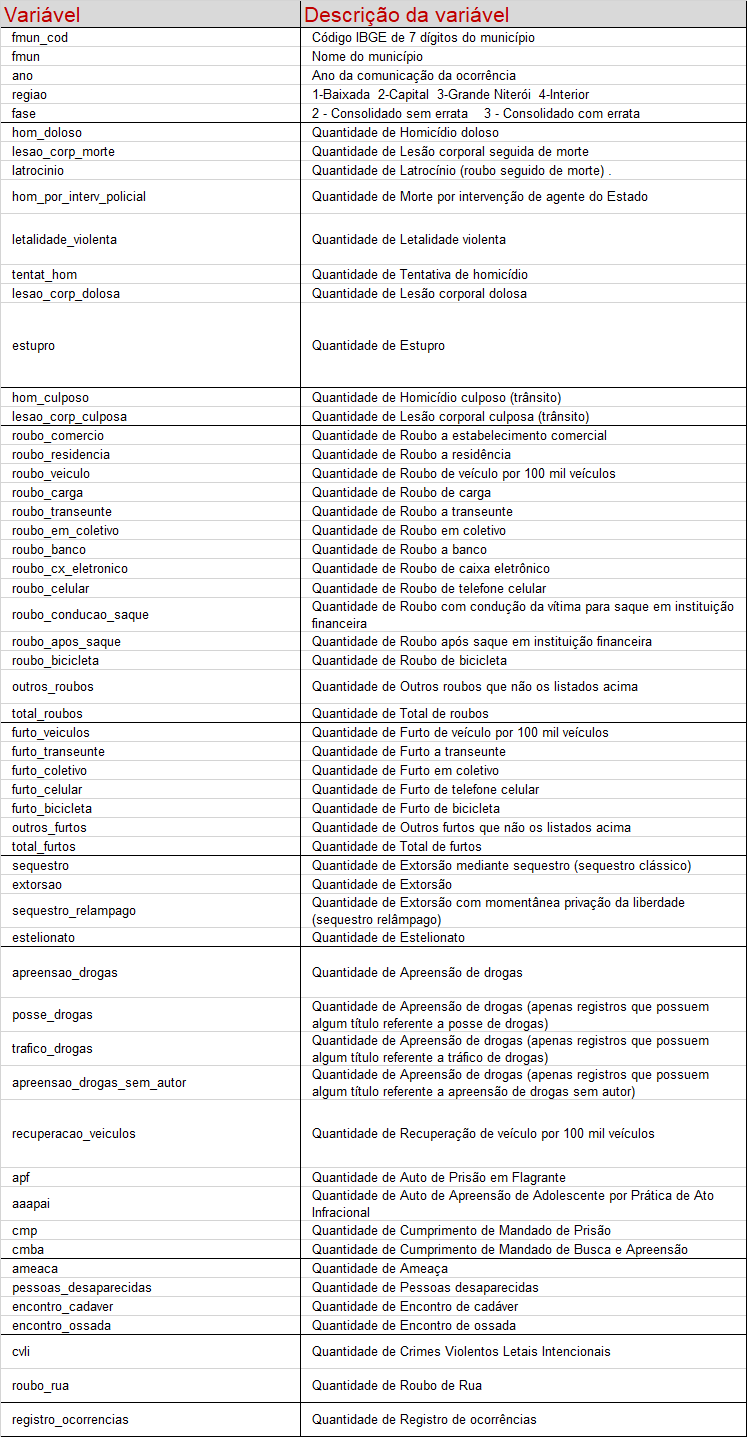

##Limpeza dos dados

Nessa etapa do projeto, será feito uma limpeza nos dados quais não serão utilizados, com intuito de deixarmos somente informações uteis e assim deixar o processo mais ágil. 

<center><img alt="Mapa do RJ" width="20%" src="https://image.flaticon.com/icons/png/512/1998/1998534.png"></center>

Os procedimentos de limpeza serão:

*   Remoção da coluna `fmun_cod`.
*   A partir da coluna `ano`, serão removidas todas as linhas as **quais não possuem o valor 2019** (ano escolhido pra estudo)
*   Remoção da coluna `mes_ano`
*   Remoção da coluna `fase`
*   Remoção da coluna `ano`(Já que todas linhas serão do ano de 2019) 
*   Tratamento de dados ausentes
*   Renomear a coluna `fmun` para `municipio`








Todos esses processos serão feitos em um novo *dataset* chamado `df_clean` a fim de preservação do *dataset* original.




In [4]:
#Criação de um dataset cópia
df_clean = df.copy()

###Remoção de linhas e colunas não úteis

In [5]:
#Tamanho do dataset antes das exclusões
df_clean.shape

(7820, 60)

In [6]:
#Remoção da coluna fmun_cod
df_clean.drop('fmun_cod', axis=1,inplace=True)

#Remoção da coluna mes_ano
df_clean.drop('mes_ano', axis=1,inplace=True)

#Remoção da coluna fase
df_clean.drop('fase', axis=1,inplace=True)


In [7]:
#Remoção das linhas nas quais o ano não é 2019
df_clean.drop(df_clean[df_clean.ano != 2019].index,axis=0,inplace=True)

In [8]:
#Remoção da coluna ano
df_clean.drop('ano',axis=1,inplace=True)

In [9]:
#Tamanho do dataset depois das exclusões
df_clean.shape

(1104, 56)

In [10]:
#Renomeando a coluna fmun para municipio
df_clean.rename(columns={'fmun':'municipio'},inplace=True)

In [11]:
#Resetando o index
df_clean.reset_index(inplace=True)
df_clean.drop('index',axis=1,inplace=True)

In [12]:
#Visualização do dataset depois das exclusões
df_clean.head()

,municipio,mes,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
0,Angra dos Reis,1,Interior,8,0,0,8,4,12,14,74,6,9,29,18,9,1,28,8,3,3,0,0,0,0,0,0,6,48,7,8,2,7,1,54,79,0,1,0,21,21,6,14,1,11,42,13,5,1,52,3,0,0,0,0,444
1,Aperibé,1,Interior,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,4,0,0,0,2,0,0,0,0,0,3,0,0,0,6,0,0,0,0,0,27
2,Araruama,1,Interior,3,0,0,3,2,5,2,54,5,2,34,21,16,1,38,1,0,4,2,0,0,0,0,0,10,55,11,5,0,14,2,82,114,0,0,0,15,51,20,28,4,9,34,16,10,0,72,5,0,0,0,0,594
3,Areal,1,Interior,1,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,0,4,1,3,0,0,2,0,0,0,1,0,0,0,0,0,16
4,Armação dos Búzios,1,Interior,0,0,0,0,0,0,5,36,2,0,6,10,6,0,16,0,0,0,1,0,0,0,0,0,0,17,5,10,2,11,3,58,89,0,0,0,8,9,2,7,0,0,11,2,10,0,17,3,0,0,0,0,253


###Tratamento de dados ausentes

Sempre antes de entrar na análise exploratória, é interessante averiguar se em nosso *dataset* existem dados ausentes.

Estes dados podem afetar diretamente o processo de análise e um eventual algoritmo de aprendizado de máquina que pode ali ser aplicado.

Caso haja algum dado faltante, um dos processos abaixo deve ser aplicado:

*   Remoção da linha ou coluna

Esta opção somente é indicada quando os valores faltantes são poucos. A exclusão de muitas linhas ou colunas podem causar uma perca significativa de outros valores úteis dentro do *dataset*.

*  Preencher os valores ausentes

Opção mais recomendada, porém, é de vital importância saber com o que preencher. É necessária uma atenção especial e considerar qual valor seria mais adequado na determinada situação. Valores como a média, mediana e valor mais frequente são muito usados nesse processo.


Para averiguar se em nosso *dataset* existem valores faltantes usaremos a função `isnull().sum()` , na qual retornará a soma de valores ausentes em cada coluna.

In [13]:
#Verificando se há valores ausentes

df_clean.isnull().sum()

municipio                     0
mes                           0
regiao                        0
hom_doloso                    0
lesao_corp_morte              0
latrocinio                    0
cvli                          0
hom_por_interv_policial       0
letalidade_violenta           0
tentat_hom                    0
lesao_corp_dolosa             0
estupro                       0
hom_culposo                   0
lesao_corp_culposa            0
roubo_transeunte              0
roubo_celular                 0
roubo_em_coletivo             0
roubo_rua                     0
roubo_veiculo                 0
roubo_carga                   0
roubo_comercio                0
roubo_residencia              0
roubo_banco                   0
roubo_cx_eletronico           0
roubo_conducao_saque          0
roubo_apos_saque              0
roubo_bicicleta               0
outros_roubos                 0
total_roubos                  0
furto_veiculos                0
furto_transeunte              0
furto_co

Como podemos observar acima, em nosso *dataset*, não existem nenhum dado ausente.

Entretanto, é interessante observar uma enorme quantidade campos preenchidos com o valor "0". Esse valor significa que não houve naquele período e naquele local uma ocorrência registrada e sendo assim **não se trata** de um dado ausente e sim o que de fato aconteceu (ou não aconteceu).

##Análise do Dados

Após alguns tratamentos feito na base, começaremos as análises no *dataset*.

<center><img alt="Analise" width="40%" src="https://image.freepik.com/vetores-gratis/analise-de-desempenho-de-negocios-com-graficos_53876-59914.jpg"></center>

###Divisão dos municípios

A terceira coluna do nosso *dataset* chamada `regiao`, descreve em qual região o município da linha está situado. Extrairemos abaixo, algumas informações dessa coluna.

####Quantidade de regiões

Em quantas regiões o estado do RJ foi dividido nesse *dataset*?

In [14]:
#Quantidade de regiões
print("Os municípios estão dividos em {} regiões".format(len(df_clean.regiao.unique())))
print("Sendo eles : {}".format(df_clean.regiao.unique()))


Os municípios estão dividos em 4 regiões
Sendo eles : ['Interior' 'Baixada Fluminense' 'Grande Niterói' 'Capital']


####Quantidade de municípios por região
Agora que sabemos a quantidade de regiões, quantos municípios temos em cada uma delas?

In [15]:
#Quantos municipios temos por região?
df_clean.regiao.value_counts() / 12

Interior              75.0
Baixada Fluminense    13.0
Grande Niterói         3.0
Capital                1.0
Name: regiao, dtype: float64

In [16]:
#Porcentagem das divisões
round(df_clean.regiao.value_counts(1),2)
per_regiao = round(df_clean.regiao.value_counts(1),2)
per_regiao = per_regiao.to_frame()
print(per_regiao)

                    regiao
Interior              0.82
Baixada Fluminense    0.14
Grande Niterói        0.03
Capital               0.01


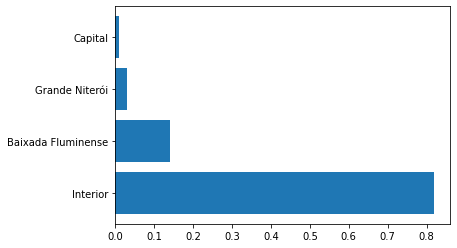

In [17]:
#Gráfico ilustrando a porcentagem
plt.barh(per_regiao.index,per_regiao['regiao'])
plt.show()

###Região com maior número de casos
Agora que sabemos como funciona a divisão dos estados, identificaremos qual delas recebeu o maior número de registros de ocorrência no ano de 2019.

Para isso, usaremos a coluna nomeada `registro_ocorrencias`. Nela estão os números de ocorrências registradas em determinado mês (coluna: `mes`).


In [18]:
registros_regiao=df_clean[['regiao','registro_ocorrencias']].groupby('regiao')

In [19]:
registros_regiao.sum().sort_values(by='registro_ocorrencias',ascending=False)

,registro_ocorrencias
regiao,
Capital,379989
Interior,169229
Baixada Fluminense,155079
Grande Niterói,77225


In [20]:
registros_regiao = registros_regiao.sum().sort_values(by='registro_ocorrencias',ascending=False)

In [21]:
#Porcentual dos registros da capital
per = round((registros_regiao['registro_ocorrencias'][0] / df_clean['registro_ocorrencias'].sum()) * 100,2)
print("As ocorrências da Capital registram {}% dos registros de todo o estado".format(per))

As ocorrências da Capital registram 48.62% dos registros de todo o estado


####Capital

A capital do estado Rio de Janeiro foi a região com mais registros total de todo o dataset. Composta somente por um município, Rio de Janeiro, a capital é responsável por 48% dos casos registrados, conhecida mundialmente como cidade maravilhosa, visitada por turistas do mundo inteiro a cidade do Rio de Janeiro tem números alarmantes. Nesse tópico iremos analisar mais os números da capital fluminense.

<center><img alt="Capital" width="70%" src="https://image.freepik.com/fotos-gratis/paisagem-do-rio-de-janeiro-cercada-pelo-mar-sob-um-ceu-azul-no-brasil_181624-17265.jpg"></center>


#####Mês a mês

Em nosso *dataset* temos uma coluna chamada `mes` na qual é representado o mês que obtiveram as ocorrências registradas naquela linha. Com ela podemos identificar em qual mês a cidade do Rio De Janeiro se mostrou mais violente no ano de 2019. Na coluna `mes`. 

Obs: Os meses são representados por números, sendo janeiro igual á 1, fevereiro igual á 2 e assim por diante.

In [22]:
#Filtrando apenas a cidade do Rio De Janeiro e transformando em um novo dataset
df_clean.query("municipio == 'Rio de Janeiro'")
df_rj = df_clean.query("municipio == 'Rio de Janeiro'")
#Resetando index do dataset df_rj e retirando coluna index
df_rj.reset_index(inplace=True)
df_rj = df_rj.drop('index',axis=1)
#retirando a coluna 'regiao' (todas serão capital)
df_rj = df_rj.drop('regiao',axis=1)

In [23]:
#Visualizando como ficou o dataset
df_rj.head()

,municipio,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
0,Rio de Janeiro,1,85,1,3,89,54,143,196,2403,139,40,974,3927,1360,779,6066,1758,283,204,40,1,6,4,54,9,1381,9806,645,1377,578,1019,78,4439,8136,0,72,2,1754,362,87,198,79,1327,911,173,490,146,2123,201,9,0,2,0,33693
1,Rio de Janeiro,2,82,3,3,88,63,151,141,2001,141,40,843,3780,1238,949,5967,1741,263,217,38,3,1,8,32,11,1255,9536,599,1367,554,1113,59,4219,7911,0,83,5,1803,377,68,208,103,1270,1041,177,503,158,1715,151,14,1,0,0,32487
2,Rio de Janeiro,3,91,3,3,97,62,159,213,2236,145,49,934,4165,1350,1015,6530,1825,268,241,29,0,2,3,54,9,1452,10413,614,2088,529,1318,96,4876,9521,0,89,3,1724,351,82,210,62,1195,973,254,495,221,1901,168,19,1,2,0,35990
3,Rio de Janeiro,4,108,1,4,113,51,164,135,2155,142,50,888,3712,1221,1046,5979,1671,251,263,43,2,3,6,47,16,1345,9626,552,1038,473,793,119,4074,7049,0,88,8,1809,383,89,220,77,1228,1076,190,683,248,1793,153,12,0,0,0,32254
4,Rio de Janeiro,5,104,1,4,109,78,187,152,1872,150,45,1004,3664,1291,1038,5993,1635,278,282,30,1,1,6,56,5,1283,9570,672,974,597,882,101,4438,7664,0,72,6,1939,361,78,196,90,1167,1081,173,712,168,1726,173,7,0,0,0,33078


In [53]:
#Mês com mais entradas totais
df_rj[['mes','registro_ocorrencias']].sort_values(by='registro_ocorrencias',ascending=False).reset_index().drop('index',axis=1)


,mes,registro_ocorrencias
0,3,35990
1,1,33693
2,5,33078
3,2,32487
4,10,32287
5,4,32254
6,7,32131
7,8,31695
8,11,29620
9,12,29292


Como podemos observar acima o mês de **Março** foi o mês com maior registros de ocorrências, com o total de 35990 entradas. O segundo mês com maior taxa foi o de Janeiro, com mais de 2000 casos a menos.

É interessante citar que:

*   O mês de Março, dado como mais perigoso, foi o mês que recebeu o carnaval do ano de 2019, evento festivo da cidade que recebe turistas do mundo inteiro e ocasionalmente deixa a cidade mais movimentada.

<center><img alt = "Carnaval" width="60%" src="https://images.squarespace-cdn.com/content/v1/55fb2427e4b0da1952ff44aa/1485521761996-8QARTZVQ9WD1Z06U7SY0/ke17ZwdGBToddI8pDm48kMIebV6MdNPQMcRDrC5oPxMUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKc73FUbOtyHSZLq0696RfXhzOQ1C7e-4RYctpOI87j69--0uIsXqDbvJ5MkV0zcn4f/image-asset.jpeg?format=1500w"</center>




*   Dos 6 meses mais perigosos, 5 deles estão no primeiro semestre do ano, levando isso em consideração, podemos dizer que o ano de **2019 começou mais perigoso do que terminou.** Essa confirmação fica nítida quando observamos o gráfico abaixo.

Text(0.5, 1.0, 'Quantidade de registros por mês')

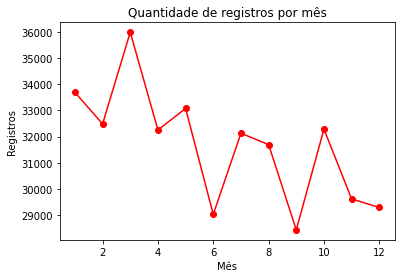

In [25]:
plt.plot(df_rj.mes,df_rj.registro_ocorrencias,'ro-')
plt.xlabel('Mês')
plt.ylabel('Registros')
plt.title("Quantidade de registros por mês")

Após concluirmos que na capital, o início do ano é um período mais violento do que o final, fica o questionamento: Será que essa característica é somente da capital? Ou será um comportamento em todo o estado? Para responder essa questão faremos:



*  Analisaremos os números de outras regiões

*   Analisaremos os números totais de todo o *dataset*




####Outras regiões
Para realizamos o primeiro passo, devemos identificar qual munícipio registrou mais ocorrência em cada região que resta (Grande Niterói, Baixada e Interior)

*   Grande Niterói

Abaixo verificaremos os números dos municípios da região Grande Niterói.

<center><img alt = "nit" width="50%" src="https://upload.wikimedia.org/wikipedia/commons/5/52/RiodeJaneiro_RMAntiga_GrandeNiteroi.png"</center>

In [26]:
#Grande Niterói
df_nit=df_clean.query("regiao == 'Grande Niterói'")[['municipio','registro_ocorrencias']].sort_values(by='registro_ocorrencias')
dfg_nit=df_nit.groupby('municipio')
dfg_nit.sum()
dfg_nit = dfg_nit.sum()
dfg_nit.sort_values(by='registro_ocorrencias',ascending=False).head(10)


,registro_ocorrencias
municipio,
São Gonçalo,44647
Niterói,26643
Maricá,5935



 **A Cidade com mais registros na Grande Niterói é : São Gonçalo.**


---




*   Baixada Fluminense

Abaixo verificaremos os números dos municípios da região Baixada Fluminense.



<center><img alt = "nit" width="50%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/RiodeJaneiro_Regiao_LesteFluminense.png/300px-RiodeJaneiro_Regiao_LesteFluminense.png"</center>

In [27]:
#Baixada Fluminense
df_bai=df_clean.query("regiao == 'Baixada Fluminense'")[['municipio','registro_ocorrencias']].sort_values(by='registro_ocorrencias')
dfg_bai=df_bai.groupby('municipio')
dfg_bai=dfg_bai.sum()
dfg_bai.sort_values(by='registro_ocorrencias',ascending=False).head(10)

,registro_ocorrencias
municipio,
Duque de Caxias,40715
Nova Iguaçu,32423
São João de Meriti,24063
Belford Roxo,16019
Magé,7993
Mesquita,7629
Nilópolis,7584
Queimados,4775
Itaguaí,4590


*  **A Cidade com mais registros na Baixada Fluminense é : Duque de Caxias.**


---




*   Interior

Abaixo verificaremos os números dos municípios da região Interior.





<center><img alt = "nit" width="50%" src="https://i.ibb.co/pJmDZWt/int.jpg"</center>

In [28]:
#Interior
df_int=df_clean.query("regiao == 'Interior'")[['municipio','registro_ocorrencias']].sort_values(by='registro_ocorrencias')
dfg_int=df_int.groupby('municipio')
dfg_int=dfg_int.sum()
dfg_int.sort_values(by='registro_ocorrencias',ascending=False).head(10)

,registro_ocorrencias
municipio,
Campos dos Goytacazes,14530
Petrópolis,10517
Cabo Frio,8237
Macaé,8196
Itaboraí,8190
Volta Redonda,8122
Rio das Ostras,7028
Teresópolis,6513
Nova Friburgo,6132


*  **A Cidade com mais registros no Interior é : Campos dos Goytacazes.**


---



##### Comparação mês a mês
Agora que identificamos os munícipios com maiores números totais em cada região, plotaremos gráficos de ocorrências para comparar o comportamento em cada região

In [29]:
#criação de um dataset com as cidades com maiores números
df_cits=df_clean.query("municipio =='Rio de Janeiro' | municipio == 'São Gonçalo' | municipio == 'Duque de Caxias' | municipio == 'Campos dos Goytacazes'" )
df_cits=df_cits[["municipio","mes","registro_ocorrencias"]]

In [ ]:
#criação da figura e seus subplots para 4 gráficos
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,8))

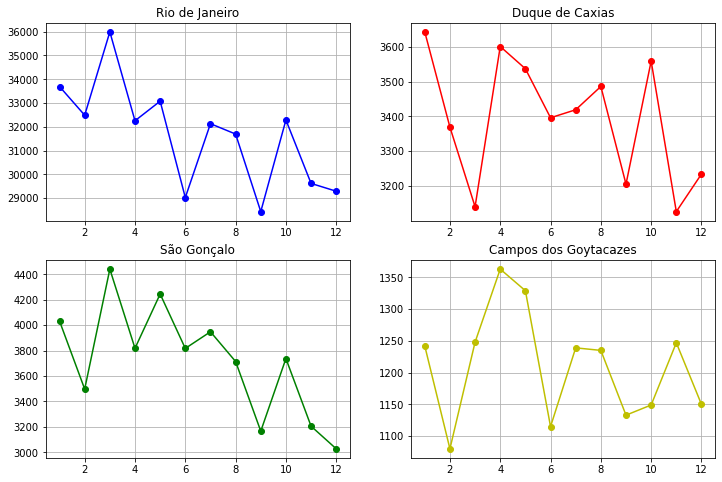

In [31]:
#plotagem dos gráficos
ax[0,0].plot(df_cits.mes.unique(),df_cits.loc[df_cits['municipio']== 'Rio de Janeiro'].registro_ocorrencias,'bo-')
ax[0,0].set_title('Rio de Janeiro')
ax[0,0].grid()
ax[0,1].plot(df_cits.mes.unique(),df_cits.loc[df_cits['municipio']== 'Duque de Caxias'].registro_ocorrencias,'ro-')
ax[0,1].set_title('Duque de Caxias')
ax[0,1].grid()
ax[1,0].plot(df_cits.mes.unique(),df_cits.loc[df_cits['municipio']== 'São Gonçalo'].registro_ocorrencias,'go-')
ax[1,0].set_title('São Gonçalo')
ax[1,0].grid()
ax[1,1].plot(df_cits.mes.unique(),df_cits.loc[df_cits['municipio']== 'Campos dos Goytacazes'].registro_ocorrencias,'yo-')
ax[1,1].set_title('Campos dos Goytacazes')
ax[1,1].grid()


fig



Analisando os gráficos acima, podemos afirmar que:


*   Exceto a cidade Duque de Caxias, da baixada, todas regiões tem seu pico de crescimento entre os meses 2 e 4 (fevereiro e abril).

*   O comportamento dos gráficos de Rio de Janeiro (Capital) e São Gonçalo (Grande Niterói) são muito semelhantes.

*  Todos municípios registraram mais ocorrências no primeiro semestre.










###Letalidade violenta

Em nosso *dataset* temos uma coluna chamada `letalidade_violenta`, nessa coluna temos todos os crimes que englobam homicídio doloso, lesão seguida de morte, latrocínio e morte pela polícia. Veremos o comportamento e características desse índice no estado do Rio de Janeiro.

<center><img alt = "Letalidade" width="60%" src="https://img.buzzfeed.com/buzzfeed-static/static/2015-10/24/11/enhanced/webdr14/original-19240-1445699153-4.jpg?downsize=800:*&output-format=auto&output-quality=auto"</center>
"</center>


####Quais são os crimes?

Como citado acima, os crimes de letalidade violenta são:

*   Homicídio doloso (Quando se tem a intenção de matar).
*   Lesão corporal seguida de morte.
*   Latrocínio (Roubo seguido de morte).
*   Morte por intervenção do agente do Estado.

Abaixo, um gráfico para ilustrar a quantidade de casos desses crimes registrados em todo estado.



In [32]:
#criando um df com os numeros somados
letalit=df_clean[['hom_doloso','lesao_corp_morte','latrocinio','hom_por_interv_policial']].sum()
letalit=letalit.to_frame("quantidade")
letalit

,quantidade
hom_doloso,4004
lesao_corp_morte,45
latrocinio,117
hom_por_interv_policial,1814


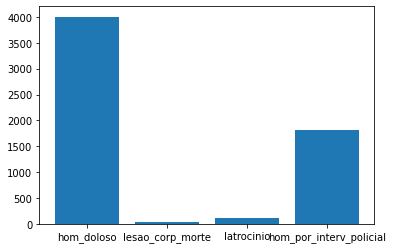

In [33]:
#gráfico dos números somados
plt.bar(letalit.index,letalit['quantidade'])
plt.show()

####Cidades com mais registros
Após vermos os números em todo estado, identificaremos as cidades que mais contribuem para esses números.

In [34]:
#criando um df com municipio, região e número de total de letalidade
letalit=df_clean[['municipio','regiao','letalidade_violenta']]
letalit=letalit.groupby(by='municipio').sum()
letalit=letalit.sort_values(by='letalidade_violenta',ascending=False)
#as 10 cidades com maiores números
letalit.head(5)

,letalidade_violenta
municipio,
Rio de Janeiro,1913
São Gonçalo,498
Duque de Caxias,407
Nova Iguaçu,372
Belford Roxo,327


In [35]:
#Porcetagem dos casos totais por cidade.
(round(letalit / df_clean['letalidade_violenta'].sum(),2)).head(5)

,letalidade_violenta
municipio,
Rio de Janeiro,0.32
São Gonçalo,0.08
Duque de Caxias,0.07
Nova Iguaçu,0.06
Belford Roxo,0.05


Como podemos ver acima, o Rio de Janeiro é o líder isolado em casos de letalidade no Estado, **responsável por 32% por casos**.

####Mês a mês

Como foi o comportamento desses crimes mês a mês em todo estado? Veremos no gráfico abaixo.



In [36]:

df_clean[['regiao','mes','letalidade_violenta']].groupby('mes').sum()
letalit=df_clean[['regiao','mes','letalidade_violenta']].groupby('mes').sum()
letalit.sort_values(by='letalidade_violenta',ascending=False)

,letalidade_violenta
mes,
1,562
5,534
7,526
8,500
4,496
6,496
3,492
2,481
9,477


Text(0.5, 1.0, 'numeros de letalidade em todo estado')

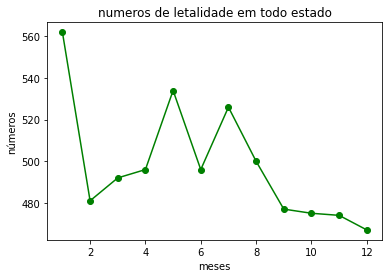

In [37]:
plt.plot(letalit.index,letalit.letalidade_violenta,'go-')
plt.xlabel('meses')
plt.ylabel('números')
plt.title('números de letalidade em todo estado');

Analisando o gráfico é possível visualizar que:
*   O mês 1 (Janeiro) foi disparado o mês com maior número de casos
*   Enorme queda do mês 1(Janeiro) para o mês 2(Fevereiro)
*   A Partir do mês 7(Julho), qual foi o terceiro mês com mais registros, os números entraram em queda gradual, até o mês 12 (Dezembro), mês com menor número casos de todo o ano.
*  O gráfico de letalidade não acompanha o comportamento do gráfico de registro totais, principalmente em relação ao pico de crescimento



Agora veremos os números mês a mês dos 5 municipios com maiores casos de letalidade, e são eles:

In [38]:
mun_let=df_clean[['municipio','letalidade_violenta']].groupby('municipio').sum()
mun_let=mun_let.sort_values(by='letalidade_violenta',ascending=False).head(5)
mun_let

,letalidade_violenta
municipio,
Rio de Janeiro,1913
São Gonçalo,498
Duque de Caxias,407
Nova Iguaçu,372
Belford Roxo,327


In [40]:
#criando um dataset com os municipios acima
ml=df_clean.query("municipio == ['Rio de Janeiro', 'São Gonçalo', 'Duque de Caxias', 'Nova Iguaçu','Belford Roxo'] ")
ml=ml[['municipio','mes','letalidade_violenta']].sort_values(by='letalidade_violenta',ascending=False)

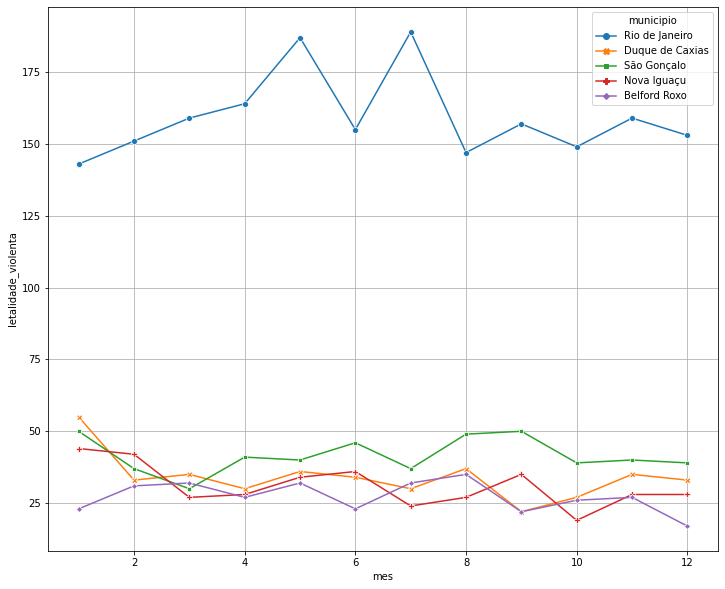

In [41]:
#Gráfico com os municipios do novo dataset
plt.subplots(figsize=(12,10))
plt.grid()
sns.lineplot(data=ml,x='mes',y='letalidade_violenta',hue='municipio',style='municipio',markers=True,dashes=False);

Analisando o gráfico é possivel visualiar que:
.   Os números do Rio de Janeiro estão muito acima dos 

*   Os números do Rio de Janeiro estão muito acima dos outros municípios.
*   Exceto Rio de Janeiro, os municípios restantes concentram seus números na faixa de 25-50 registros mensais.
*   Exceto Rio de Janeiro, todos municípios estiveram por pelo menos um mês como segundo colocado como maior número de registros.


###Crimes mais registrados


Após um estudo sobre os municípios e regiões, faremos uma análise dos crimes que estão contidos no *dataset*. 

Para poder analisarmos de forma individual cada, será necessario a remoção de colunas como: `letalidade_violenta`, `total_roubos`, `total_furtos`, `registro_ocorrencias`, colunas que são preenchidas com soma de outras.

In [42]:
#criando um novo dataset
df_crimes = df_clean.copy()
#excluindo os crimes 'totais' do novo dataset
df_crimes.drop(columns=['letalidade_violenta','total_roubos','total_furtos','registro_ocorrencias','roubo_rua','outros_furtos'],axis=1,inplace=True)

In [43]:
#verificando após exclusões
df_crimes.head()

,municipio,mes,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv
0,Angra dos Reis,1,Interior,8,0,0,8,4,14,74,6,9,29,18,9,1,8,3,3,0,0,0,0,0,0,6,7,8,2,7,1,0,1,0,21,21,6,14,1,11,42,13,5,1,52,3,0,0,0,0
1,Aperibé,1,Interior,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,3,0,0,0,6,0,0,0,0,0
2,Araruama,1,Interior,3,0,0,3,2,2,54,5,2,34,21,16,1,1,0,4,2,0,0,0,0,0,10,11,5,0,14,2,0,0,0,15,51,20,28,4,9,34,16,10,0,72,5,0,0,0,0
3,Areal,1,Interior,1,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,4,1,3,0,0,2,0,0,0,1,0,0,0,0,0
4,Armação dos Búzios,1,Interior,0,0,0,0,0,5,36,2,0,6,10,6,0,0,0,0,1,0,0,0,0,0,0,5,10,2,11,3,0,0,0,8,9,2,7,0,0,11,2,10,0,17,3,0,0,0,0


In [44]:
#Quantidade de cada crime
df_crimes.iloc[0:,3:].sum().sort_values(ascending=False) 

roubo_transeunte              78329
lesao_corp_dolosa             63655
ameaca                        60308
estelionato                   41253
roubo_veiculo                 39749
apf                           35219
lesao_corp_culposa            27628
recuperacao_veiculos          26863
roubo_celular                 26788
outros_roubos                 24065
apreensao_drogas              22749
furto_transeunte              20253
cmp                           19461
furto_celular                 18343
furto_veiculos                15595
roubo_em_coletivo             15354
trafico_drogas                12092
posse_drogas                   9004
furto_coletivo                 7924
roubo_carga                    7456
aaapai                         6056
estupro                        5450
tentat_hom                     5409
roubo_comercio                 5005
pessoas_desaparecidas          4768
cvli                           4166
hom_doloso                     4004
cmba                        

In [45]:
#Porcetagem de cada crime
round(df_crimes.iloc[0:,3:].sum().sort_values(ascending=False) / df_clean['registro_ocorrencias'].sum(),4)

roubo_transeunte              0.1002
lesao_corp_dolosa             0.0815
ameaca                        0.0772
estelionato                   0.0528
roubo_veiculo                 0.0509
apf                           0.0451
lesao_corp_culposa            0.0354
recuperacao_veiculos          0.0344
roubo_celular                 0.0343
outros_roubos                 0.0308
apreensao_drogas              0.0291
furto_transeunte              0.0259
cmp                           0.0249
furto_celular                 0.0235
furto_veiculos                0.0200
roubo_em_coletivo             0.0196
trafico_drogas                0.0155
posse_drogas                  0.0115
furto_coletivo                0.0101
roubo_carga                   0.0095
aaapai                        0.0077
estupro                       0.0070
tentat_hom                    0.0069
roubo_comercio                0.0064
pessoas_desaparecidas         0.0061
cvli                          0.0053
hom_doloso                    0.0051
c

Como podemos ver acima, o crime de `roubo_transeunte` é o mais registrado no estado do Rio de Janeiro em 2019, representando 10% do *dataset*. Em seguida vemos lesão corporal dolosa e ameaça.

####Roubo Transeunte

o Crime mais registrado no *dataset* não é um termo popular, por mais que seja o de maior número, mas afinal, o que é um Roubo Transeunte?

<center><img src='https://geekonomics.com.br/wp-content/uploads/2016/10/roubo-celular-capa.jpg' width='60%' </img></center>

Crime corriqueiro, presente em ruas, avenidas e vias movimentadas, o roubo transeunte são roubos cometidos contra pessoas que se deslocam a pé.

#####Municípios com maiores números
Agora que sabemos o que é um roubo transeunte, veremos em quais municípios eles mais estão presentes.



In [46]:
#filtrando as linhas municipios,e roubo_transeunte
df_clean[['municipio','roubo_transeunte']]
#groupby em municipio para juntar valores de todos meses + sum + head
(df_clean[['municipio','roubo_transeunte']].groupby('municipio').sum()).sort_values('roubo_transeunte',ascending=False).head(5)

,roubo_transeunte
municipio,
Rio de Janeiro,40456
São Gonçalo,8145
Duque de Caxias,6436
Nova Iguaçu,4291
São João de Meriti,3001


Como visto acima, Rio de Janeiro é disparado o município com mais roubo transeuntes no estado. É interessante observar também que:

*    O ranking de roubo transeunte tem o mesmos quatro primeiros colocados do que o ranking de letalidade violenta.
*   Aparição de São João de Meriti, se pondo no lugar de Belford Roxo que estava no ranking de letalidade violenta.
*   A capital Rio de Janeiro mais uma vez sendo a primeira colocada isoladamente.







#####Mês a Mês
Como foram distribuidos esses números durante o ano? Veremos agora no gráfico mês a mês de roubo transeunte de todo o Estado.

In [47]:
df_clean[['mes','roubo_transeunte']].groupby('mes').sum()
rt=df_clean[['mes','roubo_transeunte']].groupby('mes').sum()

rt

,roubo_transeunte
mes,
1,7454
2,7000
3,7734
4,7031
5,7332
6,6077
7,6636
8,6452
9,5794


Text(0.5, 1.0, 'roubos transeuntes em todo estado')

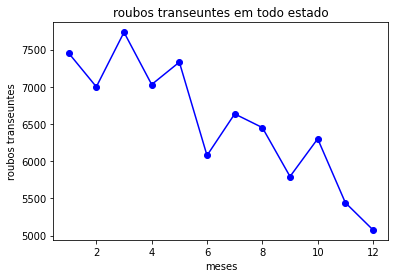

In [48]:
plt.plot(rt.index,rt.roubo_transeunte,'bo-')
plt.xlabel('meses')
plt.ylabel('roubos transeuntes')
plt.title('roubos transeuntes em todo estado');

Podemos observar que:

*   Maior pico em período carnavalesco (mês 3 - Março).
*   Os números caíram de forma significativa em comparação do mês 1 com o mês 12.
*   O gráfico de roubo transeuntes acompanha mais o gráfico de registros totais em comparação ao gráfico de letalidade.







###Crime menos registrado

No ranking criado um pouco acima de crimes mais registrados vimos o crime de 'policias mortos em serviços' com 0 registros, e por esse motivo trabalharemos com o segundo menos registrado, `sequestro`, com apenas dois registros.

#####Sequestro

Com apenas dois registros em todo ano de 2019, iremos localizar onde e quando foram esses sequestros.
<center><img src='https://notisul.com.br/wp-content/uploads/2019/11/gerente-de-banco-de-grao-para-e-vitima-de-sequestro-relampago-1-696x376.jpg' width='60%' </img></center>

In [49]:
#Localizando os registros de sequestros
df_clean.query("sequestro != 0")[['municipio','mes','regiao','sequestro']]

,municipio,mes,regiao,sequestro
1064,Paraty,12,Interior,1
1093,Seropédica,12,Baixada Fluminense,1


Encontrado os dois sequestros registrados, é interessante citar que:

*   Os dois registros foram no mesmo mês de dezembro (12).
*   Os registros não foram feitos na capital Rio de Janeiro, líder em todos rankings vistos até aqui em nosso *dataset*.
*   É possível encontrar  matérias em portais de jornalismo desses sequestros citados acima:

[Sequestro de Paraty](https://g1.globo.com/rj/sul-do-rio-costa-verde/noticia/2019/12/05/presos-tres-suspeitos-de-envolvimento-em-sequestro-de-empresaria-em-paraty.ghtml)

[Sequestro de Seropédica](https://g1.globo.com/rj/rio-de-janeiro/noticia/2019/12/13/policia-investiga-sequestro-de-idoso-que-durou-mais-de-24-horas-no-rj.ghtml)






##Conclusão

Feito as análises, é possível tirar de conclusão que o estado do Rio de Janeiro têm sim, problemas de violência espalhados por todo o território, porém, é evidente que a capital do Rio de Janeiro é isoladamente a maior responsável pelos números do Estado.

É necessário citar também municípios da Baixada Fluminense, como Nova Iguaçu, Belford Roxo, Duque de Caxias e São João de Meriti, municípios que apresentaram números altos, além de São Gonçalo na Grande Niterói.

Apesar de números alarmantes, o ano de 2019 foi um ano que terminou melhor do que começou. Os gráficos no estudo mostram quase sempre uma baixa conforme que o ano vai passando.

Por fim, é importante reafirmar que os números são somente de casos **registrados** pela polícia civil e militar e também categorizado pelos mesmos.

*Esse projeto foi feito apenas com cunho estudantil e exploratório, sem vínculo com nenhuma marca ou órgão governamental. Aberto a críticas e sugestões.*



---

Contato

[Linkedin](https://www.linkedin.com/in/geovane-melo-da-silva-105040147/)

[GitHub](https://github.com/geovanemelo)

geovanemelo81@gmail.com
